# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

k-mean cluster mengelompokan bentuk data yang terlihat similiar menjadi sebuah cluster.

Steps:
1. Menentukan jumlah cluster (dalam hal ini `k`) yang ingin diidentifikasi dalam data.
2. Memilih random `k` titik data yang berbeda yang menjadi inisial cluster.
3. Menghitung jarak antara titik data (dari data selain inisial cluster) ke setiap `k` inisial cluster.
4. Meng-assign titik data tadi menjadi cluster dengan jarak terdekat.
5. Mengulangi langkah dari langkah ketiga sampai dengan seluruh titik data telah di-clustering.
6. Menghitung rata-rata (mean) dari setiap cluster.
7. Mengulangi langkah ketiga dan keempat tetapi dengan memakai jarak ke setiap mean cluster.

Source: <a href='https://youtu.be/4b5d3muPQmA?t=18'>StatQuest: K-means clustering</a>



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
#code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Get upper and lower bound of data with q1, q2, and interquartil
# Param     : x dataframe attribute type
# Return    : list of float tuple 
def bound(x):
    # Calculate q1, q3 and interquartile
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1

    # Calculate the lower and upper bound of data
    lower_ = q1 - (iqr * 1.5)
    upper_ = q3 + (iqr * 1.5)

    return (upper_, lower_)

# Replace NaN value with last valid data
df = df.fillna(method='ffill')

# Get tuple of upper and lower bound of column Umur and Skor Belanja (1-100)
upper_umur, lower_umur = bound(df['Umur'])
upper_skor, lower_skor = bound(df['Skor Belanja (1-100)'])

# Filter value data with interquartil range
df = df[(df['Umur'] < upper_umur) & (df['Umur'] > lower_umur)]
df = df[(df['Skor Belanja (1-100)'] < upper_skor) & (df['Skor Belanja (1-100)'] > lower_skor)]

In [3]:
# Rescale data with StandardScaler
from sklearn import preprocessing

# Change dtype of column 'Jenis Kelamin' into an integer32
for column in df.columns:

    # Search data with type(object)
    if df[column].dtype == type(object):

        # Encode target labels with value between 0 and n_classes-1.
        le = preprocessing.LabelEncoder()
        
        df[column] = le.fit_transform(df[column])

# Fit data scaling on dataframe
dfscale = StandardScaler().fit_transform(df)

df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,0,19.0,15,39.0
1,2,0,21.0,15,81.0
2,3,1,20.0,16,6.0
3,4,1,23.0,16,77.0
4,5,1,31.0,17,40.0


In [4]:
# 2-means clustering
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=42).fit(dfscale)
labels2 = kmeans2.labels_

dfclust2 = pd.DataFrame(data=df, columns=['Umur', 'Skor Belanja (1-100)'])
label_2 = kmeans2.labels_
dfclust2['label_2'] = label_2

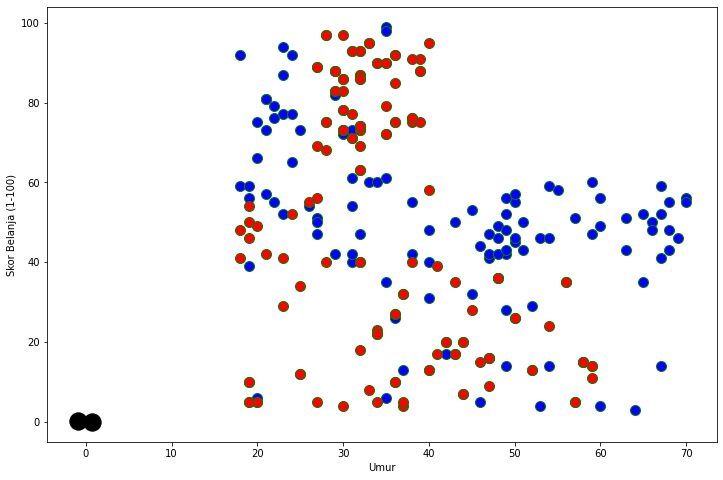

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(dfclust2['Umur'][dfclust2.label_2 == 0], dfclust2['Skor Belanja (1-100)'][dfclust2.label_2 == 0], c='blue', s=100, edgecolors='green')
plt.scatter(dfclust2['Umur'][dfclust2.label_2 == 1], dfclust2['Skor Belanja (1-100)'][dfclust2.label_2 == 1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c='k', s=300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')

plt.show()

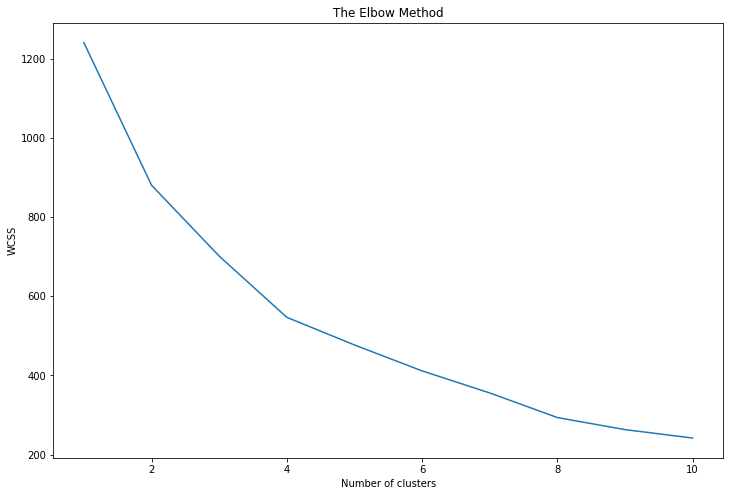

In [6]:
# Elbow method
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dfscale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [7]:
# 3-means clustering 
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(dfscale)
labels3 = kmeans3.labels_

dfclust3 = pd.DataFrame(data=df, columns=['Umur', 'Skor Belanja (1-100)'])
label_3 = kmeans3.labels_
dfclust3['label_3'] = label_3

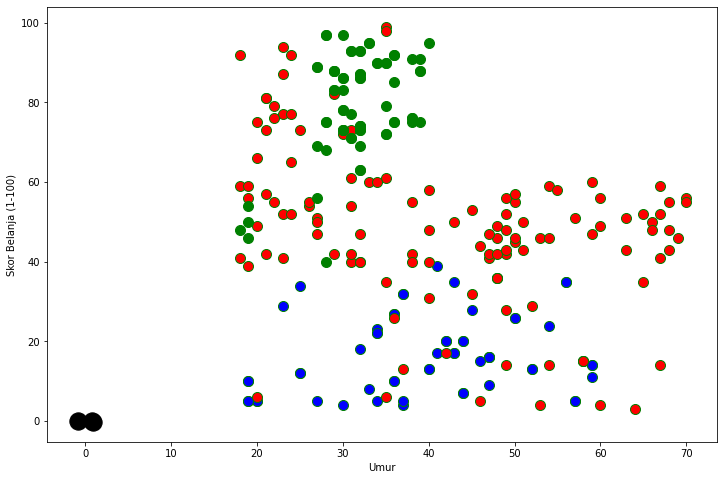

In [8]:
plt.figure(figsize=(12,8))

plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 0], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 0], c='blue', s=100, edgecolors='green')
plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 1], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 1], c='red', s=100, edgecolors='green')
plt.scatter(dfclust3['Umur'][dfclust3.label_3 == 2], dfclust3['Skor Belanja (1-100)'][dfclust3.label_3 == 2], c='green', s=100, edgecolors='green')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='k', s=300)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Kelompok pada rentang umur yang lebih tua (lebih dari rentang 0) memberikan rating skor pembelajaan kurang dari 50%.

Namun pada rentang umur yang lebih muda (kurang dari rentang 1) memberikan variasi rating yang beragam.

Kemudian untuk ketepatan dari jumlah cluster yang diberikan dapat memakai dapat dilihat dari grafik The Elbow Method dimana rentang jumlah cluster yang tepat berada pada posisi **elbow** (rentang 2 sampai 3)

> Untuk kakak pengoreksi: Gambar saya tidak jadi hiks T^T There was some bug that I couldn't handle it